In [97]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [103]:
#Import dataframes 

df_player_stats = pd.read_csv('DataFiles/player_stats_100pos.csv')
df_bio = pd.read_csv('DataFiles/df_bio.csv')
data_index = pd.read_csv('DataFiles/data_index.csv')

In [104]:
columns_to_delete = ['PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
                     'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
                     'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
                     'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
                     'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
                     'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
                     'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK']

# Delete the specified columns
df_player_stats.drop(columns=columns_to_delete, inplace=True, errors='ignore')

df_player_stats.rename(columns={'Season_type': 'Season'}, inplace=True)

In [105]:
# Columns to be dropped in 'df_bio' table:
df_bio.drop(columns=['PLAYER_HEIGHT', 'PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT', 'PTS', 'REB', 'AST'], inplace=True, errors='ignore')

In [106]:
# Merge 'df_player_stats' and ‘df_bio‘ on common keys ‘PLAYER_ID‘ and ‘Year‘ in order to get 'COUNTRY' column.
merged_df_stats_bio = pd.merge(df_player_stats, df_bio, on=['PLAYER_ID', 'Year', 'Season'], how='inner')

columns_to_delete_merged = ['GP_y','NET_RATING','OREB_PCT','DREB_PCT','USG_PCT', 'TS_PCT','AST_PCT']

merged_df_stats_bio.drop(columns=columns_to_delete_merged, inplace=True)          

In [107]:
# Checking the result of 'merged_df_stats_bio'
merged_df_stats_bio.shape

(18282, 42)

In [108]:
# Merging 'merged_df_stat_bio' with player index table on player-id to get player´s role/position.
final_merged_df = pd.merge(merged_df_stats_bio, data_index, left_on='PLAYER_ID', right_on='PERSON_ID', how='inner')

# Dropping all duplicate columns with trailing letter 'y'.
columns_to_drop = [col for col in final_merged_df.columns if 'y' in col]
final_merged_df.drop(columns=columns_to_drop, inplace=True)

# Dropping redundant columns
columns_to_drop_2 = [
    'PLAYER_LAST_NAME',
    'PLAYER_FIRST_NAME',
    'PLAYER_SLUG',
    'TEAM_ID',
    'TEAM_SLUG',
    'IS_DEFUNCT',
    'TEAM_NAME',
    'NICKNAME',
    'TEAM_ABBREVIATION',
    'ROSTER_STATUS',
    'STATS_TIMEFRAME', 
    'PERSON_ID',
    'TEAM_CITY'
]

final_merged_df.drop(columns=columns_to_drop_2, inplace=True)

In [109]:
# Drop '_x' at the end of column names 
for column in final_merged_df.columns: 
    if '_x' in column: 
        column_name = column.replace('_x', '')
        final_merged_df.rename(columns={column:column_name}, inplace=True)

# Change regular season name at 'Season' column  
final_merged_df['Season'] = final_merged_df['Season'].apply(lambda x:'Regular Season' if x =='Regular%20Season' else x)

In [ ]:
# Output of final dataframe
nj = final_merged_df[(final_merged_df['PLAYER_NAME'] == 'Nikola Jokic')]
nj

# We don´t need:
# PFD, PLAYER_HEIGHT, PLAYER_HEIGHT_INCHES, PLAYER_WEIGHT, PTS, REB, AST

In [111]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [112]:
# Function to filer on countries
def filter_europe(df, column_name='', country_list=europe):
    return df[df[column_name].isin(europe)]

# New object df for European players only
europe_df = filter_europe(final_merged_df, 'COUNTRY')
europe_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR
69,1059,Aleksandar Djordjevic,1610612757,POR,29.0,8,4,4,0.500,51.4,6.6,13.2,0.500,4.1,5.8,0.714,3.3,4.1,0.800,0.8,3.3,4.1,4.1,4.1,0.0,0.0,0.0,2.5,0.0,20.7,1996-97,Regular Season,None,Serbia,Undrafted,Undrafted,Undrafted,19,G,6-2,198.0,1996,1996
286,717,Arvydas Sabonis,1610612757,POR,32.0,69,43,26,0.623,51.3,9.6,19.2,0.498,1.4,3.8,0.371,6.5,8.4,0.777,3.3,12.6,15.9,4.3,4.4,1.8,2.4,1.0,5.9,0.0,27.0,1996-97,Regular Season,None,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002
287,717,Arvydas Sabonis,1610612757,POR,32.0,4,1,3,0.250,53.9,9.0,21.1,0.429,1.0,4.0,0.250,3.5,4.0,0.875,4.0,9.0,13.1,4.5,4.5,1.5,1.5,2.5,9.5,4.0,22.6,1996-97,Playoffs,None,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002
288,717,Arvydas Sabonis,1610612757,POR,33.0,73,40,33,0.548,52.1,9.1,18.5,0.493,0.7,2.6,0.261,7.2,9.1,0.798,3.3,13.0,16.3,4.9,4.2,1.5,1.8,1.0,6.0,0.0,26.1,1997-98,Regular Season,None,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002
289,717,Arvydas Sabonis,1610612757,POR,33.0,4,1,3,0.250,53.0,9.0,19.9,0.450,0.5,1.0,0.500,6.0,7.0,0.857,3.5,11.9,15.4,3.0,5.0,3.5,1.5,3.5,9.5,0.0,24.4,1997-98,Playoffs,None,Lithuania,1986,1,24,11,C,7-3,292.0,1995,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18252,1631217,Moussa Diabate,1610612746,LAC,21.0,22,10,12,0.455,47.3,5.8,11.4,0.511,0.2,0.5,0.500,2.4,3.9,0.625,7.5,4.6,12.1,1.0,2.2,1.7,1.9,1.5,3.6,3.9,14.3,2022-23,Regular Season,Michigan,France,2022,2,43,25,F,6-9,210.0,2022,2023
18254,1631107,Nikola Jovic,1610612748,MIA,20.0,15,7,8,0.467,48.4,6.6,16.4,0.406,1.9,8.3,0.229,4.3,4.5,0.947,2.1,5.2,7.3,2.4,2.4,1.7,0.5,0.0,4.5,4.5,19.4,2022-23,Regular Season,None,Serbia,2022,1,27,5,F,6-10,205.0,2022,2023
18255,1631107,Nikola Jovic,1610612748,MIA,20.0,7,3,4,0.429,46.7,3.7,14.8,0.250,0.0,7.4,0.000,0.0,0.0,0.000,3.7,14.8,18.5,0.0,0.0,0.0,0.0,3.7,0.0,0.0,7.4,2022-23,Playoffs,None,Serbia,2022,1,27,5,F,6-10,205.0,2022,2023
18258,1631172,Ousmane Dieng,1610612760,OKC,20.0,39,20,19,0.513,46.7,6.2,14.9,0.420,2.1,8.0,0.265,1.2,1.9,0.652,1.6,7.1,8.6,3.8,2.1,1.1,0.6,0.7,3.4,1.6,15.8,2022-23,Regular Season,None,France,2022,1,11,13,F,6-9,185.0,2022,2023


In [113]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Sort the DataFrame by the 'W' column in descending order
sorted_df = europe_df.sort_values(by='W', ascending=False)

# Get the top 10 players with the most wins
top_10_players = sorted_df.head(10)

# Display the top 10 players with their respective countries
print(top_10_players[['PLAYER_NAME', 'W', 'COUNTRY']])


            PLAYER_NAME   W         COUNTRY
6814          Pau Gasol  64           Spain
9024      Sasha Vujacic  64        Slovenia
7681         Boris Diaw  64          France
4632      Dirk Nowitzki  64         Germany
8909          Luol Deng  62  United Kingdom
14660      Clint Capela  62     Switzerland
12733         Omer Asik  62          Turkey
10866   Marco Belinelli  61           Italy
5021   Rasho Nesterovic  61        Slovenia
6964        Tony Parker  61          France


In [ ]:
# Step 1: Sort the DataFrame by the 'W' column in descending order
sorted_df = europe_df.sort_values(by='W', ascending=False)

# Step 2: Get the top 10 players with the most wins
top_10_players = sorted_df.head(10)

# Step 3: Filter the original DataFrame to get the full player profiles of these top 10 players
top_10_player_profiles = europe_df[europe_df['PLAYER_ID'].isin(top_10_players['PLAYER_ID'])]

# Display the full player profiles of the top 10 players
print(top_10_player_profiles)


In [ ]:


# Display the first few rows of the dataset
print(europe_df.head())

# Display summary statistics of numerical columns
print(europe_df.describe())

# Check the data types of columns
print(europe_df.dtypes)

# Check for missing values
print(europe_df.isnull().sum())


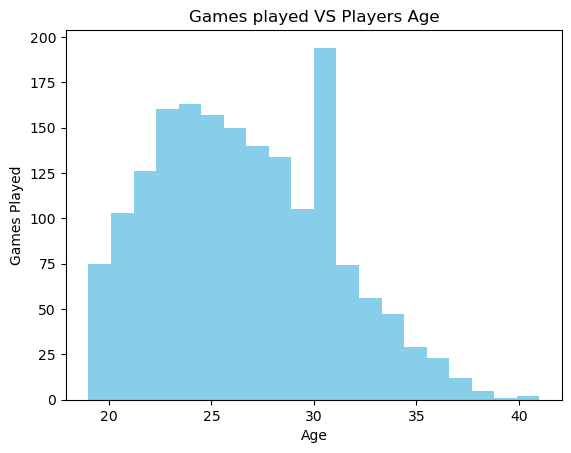

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of player ages
plt.hist(europe_df['AGE'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Games Played')
plt.title('Games played VS Players Age')
plt.show()



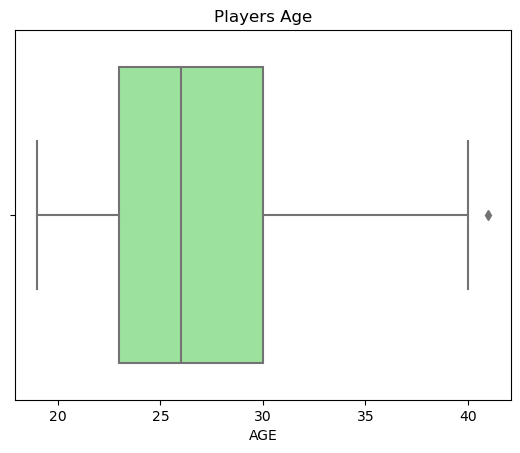

In [117]:
# Box plot of player ages
sns.boxplot(x='AGE', data=europe_df, color='lightgreen')
plt.title('Players Age')
plt.show()

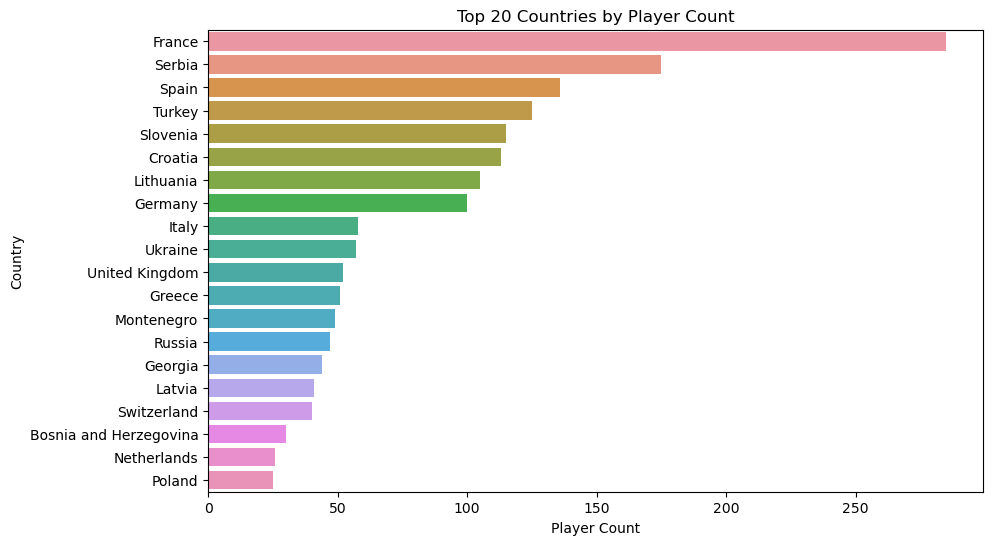

In [118]:
# Bar plot of countries
plt.figure(figsize=(10, 6))
sns.countplot(y='COUNTRY', data=europe_df, order=europe_df['COUNTRY'].value_counts().index[:20])
plt.title('Top 20 Countries by Player Count')
plt.xlabel('Player Count')
plt.ylabel('Country')
plt.show()

Count of Players by Position:
C      560
F      518
G      279
C-F    148
G-F     98
F-C     92
F-G     61
Name: POSITION, dtype: int64


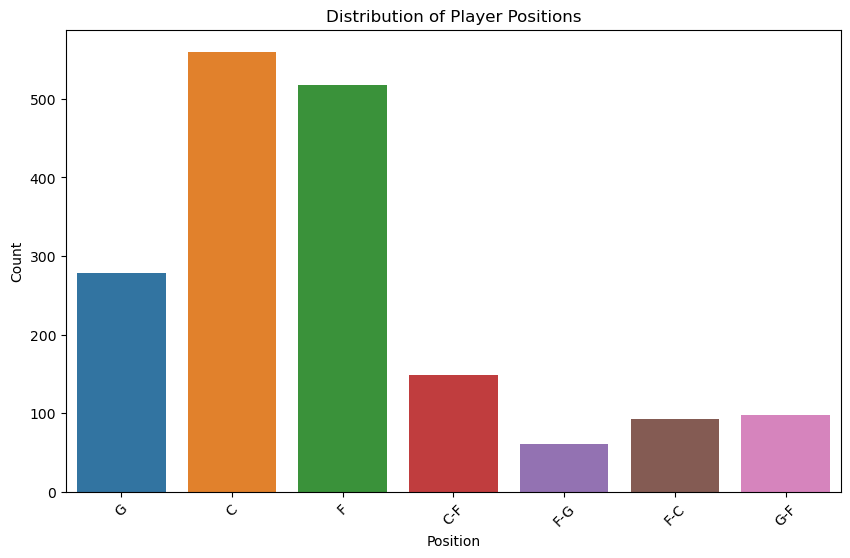


Correlation of Position with Average Points per Game:
POSITION
F-C    21.465217
F      19.756564
G      19.551254
C-F    18.741892
C      18.627143
F-G    18.345902
G-F    17.116327
Name: PTS, dtype: float64


In [119]:

# Count of Players by Position
position_counts = europe_df['POSITION'].value_counts()
print("Count of Players by Position:")
print(position_counts)

# Visualization of Position Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=europe_df, x='POSITION')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# # Summary Statistics
# print("\nSummary Statistics for Position:")
# print(position_counts.describe())

# Correlation with other variables (example: PTS)
position_pts_corr = europe_df.groupby('POSITION')['PTS'].mean().sort_values(ascending=False)
print("\nCorrelation of Position with Average Points per Game:")
print(position_pts_corr)


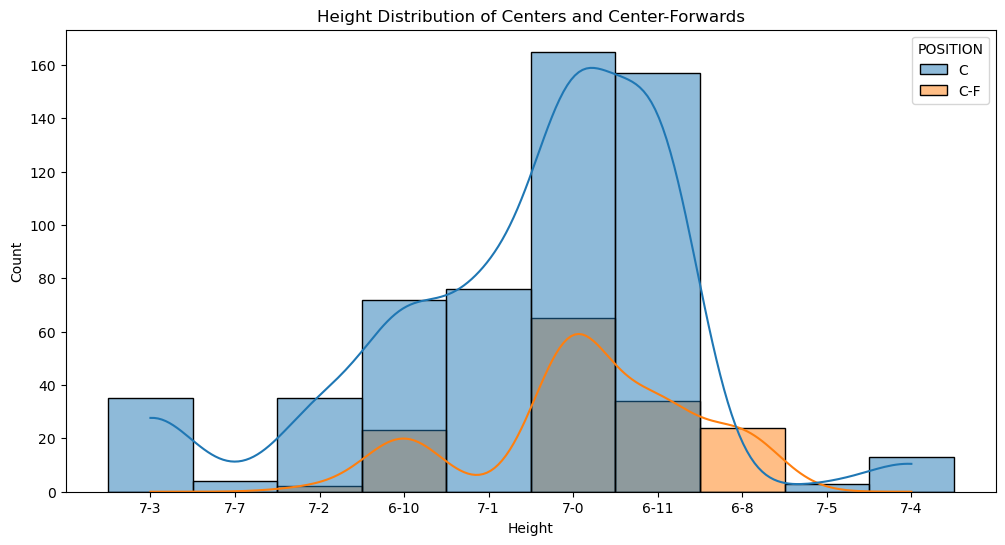

In [120]:
# Filter data for players with positions 'C' and 'C-F'
center_data = europe_df[europe_df['POSITION'].isin(['C', 'C-F'])]

# Comparison of Performance Metrics
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=center_data, x='POSITION', y='PTS', showmeans=True)
# plt.title('Comparison of Points per Game between Centers and Center-Forwards')
# plt.xlabel('Position')
# plt.ylabel('Points per Game')
# plt.show()

# Height and Weight Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=center_data, x='HEIGHT', hue='POSITION', bins=20, kde=True)
plt.title('Height Distribution of Centers and Center-Forwards')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()



In [121]:
# Filter data for players with positions 'C' and 'C-F'
center_data = europe_df[europe_df['POSITION'].isin(['C', 'C-F'])]

# Group by country and count the number of players
country_counts = center_data.groupby('COUNTRY').size().reset_index(name='Player_Count')

# Sort by player count in descending order
country_counts_sorted = country_counts.sort_values(by='Player_Count', ascending=False)

# Select the top 10 countries
top_10_countries = country_counts_sorted.head(10)

print(top_10_countries)


        COUNTRY  Player_Count
5        France           107
19       Serbia            88
21        Spain            60
23       Turkey            54
12    Lithuania            51
3       Croatia            38
6       Georgia            35
24      Ukraine            34
20     Slovenia            31
14  Netherlands            26


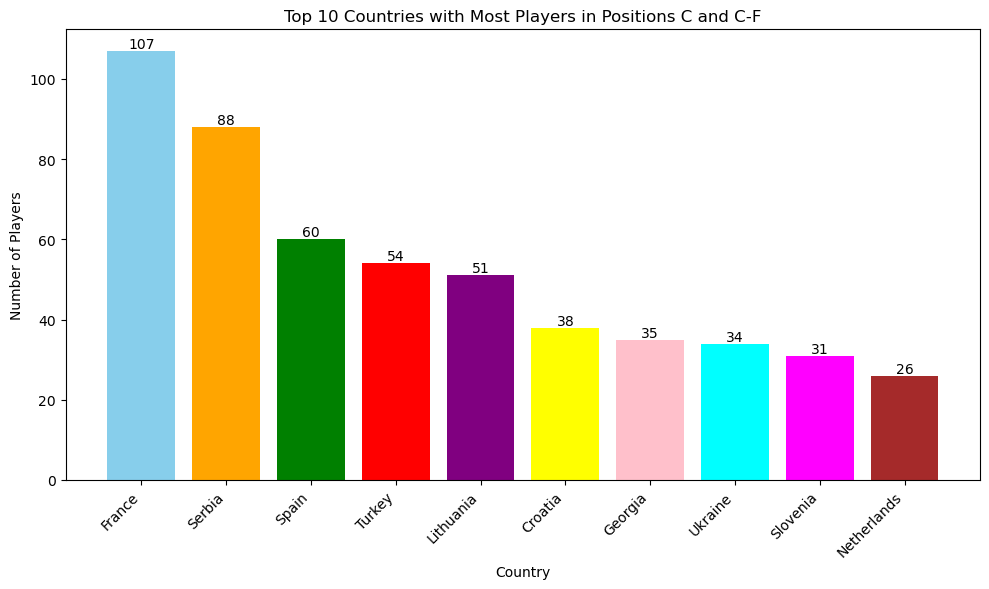

In [123]:
import matplotlib.pyplot as plt

# Define colors for each country
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'brown']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_countries['COUNTRY'], top_10_countries['Player_Count'], color=colors)
plt.title('Top 10 Countries with Most Players in Positions C and C-F')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


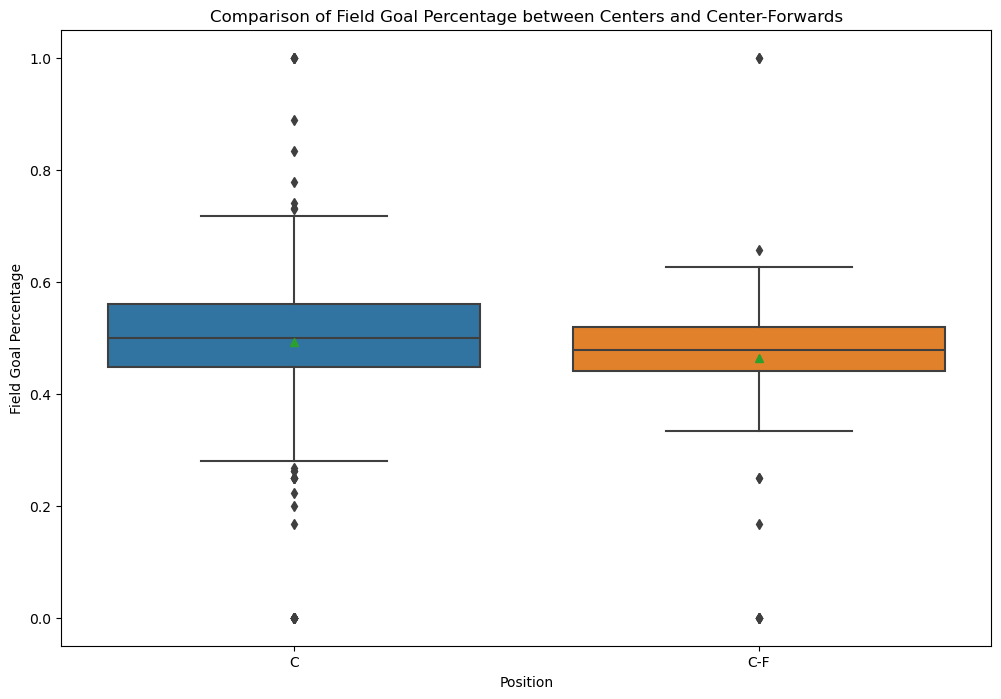

In [124]:
# Comparison of Efficiencies
plt.figure(figsize=(12, 8))
sns.boxplot(data=center_data, x='POSITION', y='FG_PCT', showmeans=True)
plt.title('Comparison of Field Goal Percentage between Centers and Center-Forwards')
plt.xlabel('Position')
plt.ylabel('Field Goal Percentage')
plt.show()


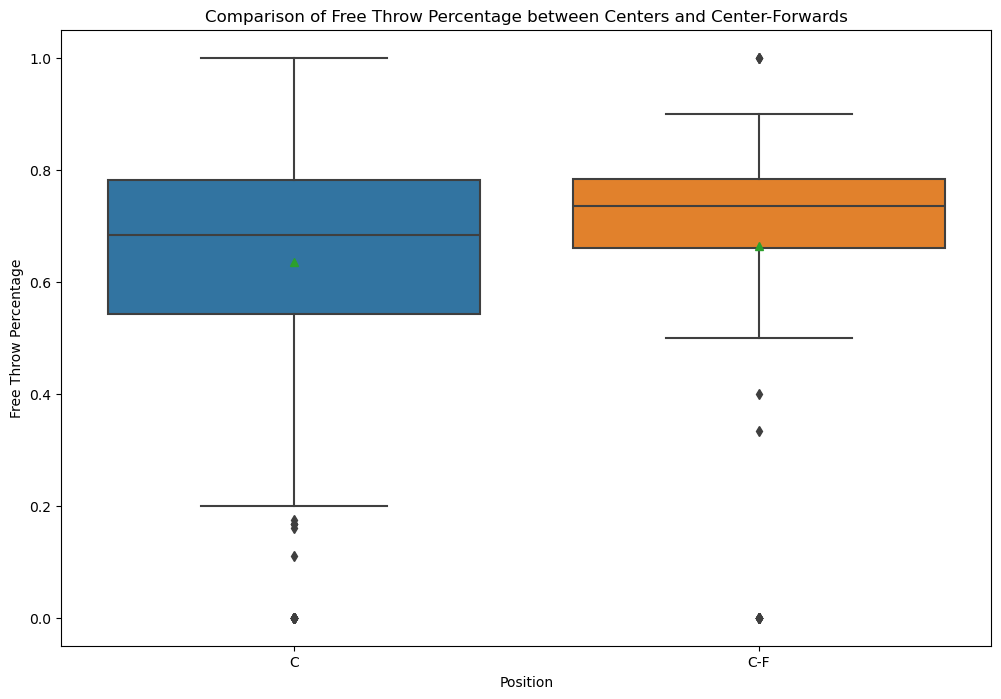

In [74]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=center_data, x='POSITION', y='FT_PCT', showmeans=True)
plt.title('Comparison of Free Throw Percentage between Centers and Center-Forwards')
plt.xlabel('Position')
plt.ylabel('Free Throw Percentage')
plt.show()


GP-Games Played

MIN-Minutes Played

PTS-Points

FGM-Field Goals Made

FGA-Field Goals Attempted

FG%-Field Goal Percentage

3PM - 3 Point Field Goals Made

3PA - 3Point Field Goals Attempted

3P% - 3 Point Field Goal Percentage

FTM-Free Throws Made

FTA-Free Throws Attempted

FT%-Free Throw Percentage

OREB-Offensive Rebounds

DREB-Defensive Rebounds

REB-Rebounds

AST-Assists

STL-Steals

BLK-Blocks

TOV-Turnovers

1. Points per Game (PPG): Average number of points scored by the player per game.


In [75]:
# Grouping players by name and calculating the average PPG across all seasons
# player_stats = europe_df.groupby('PLAYER_NAME')['PTS'].mean().reset_index()
player_ppg = europe_df.groupby('PLAYER_NAME').agg({
    'PTS': 'mean',              # Mean PPG
    'GP': 'sum'        # Sum of total games played
}).reset_index()
# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_top_20_players = player_ppg.sort_values(by='PTS', ascending=False).head(20)

ppg_top_20_players


,PLAYER_NAME,PTS,GP
119,Luka Doncic,29.612500,358
75,Giannis Antetokounmpo,23.994444,798
154,Nikola Jokic,23.346154,664
50,Dirk Nowitzki,21.997222,1667
115,Kristaps Porzingis,19.533333,412
117,Lauri Markkanen,17.100000,348
67,Franz Wagner,16.900000,159
216,Tony Parker,16.408571,1480
158,Nikola Vucevic,16.250000,839
170,Pau Gasol,16.023333,1362


1. Points per Game (PPG): SUM number of points scored by the player per game.

In [76]:
# Grouping players by name and calculating the SUM PPG across all seasons
player_stats = europe_df.groupby('PLAYER_NAME')['PTS'].sum().reset_index()

# Sort the player_stats dataframe by PPG in descending order and get the top 20 players
ppg_euro_players = player_stats.sort_values(by='PTS', ascending=False).head(20)

ppg_euro_players


,PLAYER_NAME,PTS
50,Dirk Nowitzki,791.9
216,Tony Parker,574.3
170,Pau Gasol,480.7
75,Giannis Antetokounmpo,431.9
173,Peja Stojakovic,368.2
121,Luol Deng,310.9
154,Nikola Jokic,303.5
123,Marc Gasol,302.5
78,Goran Dragic,282.0
41,Danilo Gallinari,279.7


2.Field Goal Percentage (FG%): Percentage of field goals made out of attempted shots, indicating shooting efficiency.

In [77]:
# Calculate Field Goal Percentage (FG%)
europe_df['FG%'] = (europe_df['FGM'] / europe_df['FGA']) * 100

# Grouping players by name and calculating the average FG%
player_stats = europe_df.groupby('PLAYER_NAME')['FG%'].mean().reset_index()

# Sort the player_stats dataframe by FG% in descending order and get the top 20 players
fg_perct_top_20_players = player_stats.sort_values(by='FG%', ascending=False).head(20)

fg_perct_top_20_players

/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_4825/4272277758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_df['FG%'] = (europe_df['FGM'] / europe_df['FGA']) * 100


,PLAYER_NAME,FG%
180,Ratko Varda,66.666667
188,Rudy Gobert,63.977118
14,Andris Biedrins,63.169039
87,Isaiah Hartenstein,61.331425
221,Viacheslav Kravtsov,61.111111
90,Jakob Poeltl,59.909639
96,Joel Bolomboy,59.401709
32,Clint Capela,57.979818
88,Ivica Zubac,57.811804
15,Ante Zizic,57.628830


Three-Point Percentage (3P%): Percentage of three-point shots made out of attempted three-pointers, measuring accuracy from beyond the arc.

In [78]:
# Calculate Three-Point Percentage (3P%)
europe_df['3P%'] = (europe_df['FG3M'] / europe_df['FG3A']) * 100

#Grouping players by name and calculating the average 3P%
player_stats = europe_df.groupby('PLAYER_NAME')['3P%'].mean().reset_index()

# Sort the player_stats dataframe by 3P% in descending order and get the top 20 players
three_p_avg_top_20_players = player_stats.sort_values(by='3P%', ascending=False).head(20)

three_p_avg_top_20_players


/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_4825/461674736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_df['3P%'] = (europe_df['FG3M'] / europe_df['FG3A']) * 100


,PLAYER_NAME,3P%
218,Uros Slokar,100.000000
203,Slava Medvedenko,66.666667
2,Aleksandar Djordjevic,66.666667
58,Efthimios Rentzias,50.000000
122,Maciej Lampe,50.000000
217,Tornike Shengelia,50.000000
179,Rasho Nesterovic,50.000000
229,Vlatko Cancar,42.763158
108,Kelenna Azubuike,41.814357
135,Mehmet Okur,41.555446


In [79]:
# Calculate Three-Point sum (3P%)
europe_df['3 POINTS SUM'] = (europe_df['FG3M'] / europe_df['FG3A']) * 100

#Grouping players by name and calculating the average 3P%
player_stats = europe_df.groupby('PLAYER_NAME')['3 POINTS SUM'].sum().reset_index()

# Sort the player_stats dataframe by 3P% in descending order and get the top 20 players
three_p_sum_top_20_players = player_stats.sort_values(by='3 POINTS SUM', ascending=False).head(20)

three_p_sum_top_20_players

/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_4825/812745993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_df['3 POINTS SUM'] = (europe_df['FG3M'] / europe_df['FG3A']) * 100


,PLAYER_NAME,3 POINTS SUM
50,Dirk Nowitzki,1309.781715
216,Tony Parker,1091.173289
82,Hedo Turkoglu,930.783299
173,Peja Stojakovic,878.688313
152,Nicolas Batum,827.134499
170,Pau Gasol,768.446970
78,Goran Dragic,741.802621
27,Boris Diaw,735.805559
125,Marco Belinelli,718.872822
208,Thabo Sefolosha,700.582085


4.Free Throw Percentage (FT%): Percentage of free throw shots made out of attempted free throws, reflecting proficiency at the free-throw line.

In [80]:
# Calculate Free Throw Percentage (FT%)
europe_df['FT%'] = (europe_df['FTM'] / europe_df['FTA']) * 100

# Grouping players by name and calculating mean and sum of FT%
player_stats = europe_df.groupby('PLAYER_NAME').agg({
    'FT%': ['mean', 'sum']
}).reset_index()

# Rename columns for clarity
player_stats.columns = ['Player', 'Mean_FT%', 'Sum_FT%']

# Sort the player_stats dataframe by Mean_FT% in descending order and get the top 20 players
free_throw_20_players = player_stats.sort_values(by='Mean_FT%', ascending=False).head(25)

free_throw_20_players



/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_4825/3967135809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  europe_df['FT%'] = (europe_df['FTM'] / europe_df['FTA']) * 100


,Player,Mean_FT%,Sum_FT%
212,Tim Ohlbrecht,100.000000,100.000000
36,Damien Inglis,100.000000,100.000000
149,Nemanja Nedovic,100.000000,100.000000
211,Tibor Pleiss,100.000000,100.000000
180,Ratko Varda,100.000000,100.000000
146,Nando De Colo,94.444444,283.333333
155,Nikola Jovic,92.307692,92.307692
141,Miroslav Raduljica,90.909091,181.818182
220,Vassilis Spanoulis,89.285714,178.571429
151,Nico Mannion,88.888889,88.888889


5.Rebounds per Game (RPG): Average number of rebounds grabbed by the player per game, indicating their ability to secure missed shots.

In [81]:
# Grouping players by name and calculating the mean OREB
player_stats = europe_df.groupby('PLAYER_NAME')['OREB'].mean().reset_index()

# Sort the player_stats dataframe by RPG in descending order and get the top 20 players
oreb_top_20_players = player_stats.sort_values(by='OREB', ascending=False).head(20)

oreb_top_20_players 


,PLAYER_NAME,OREB
188,Rudy Gobert,3.376471
32,Clint Capela,2.970588
102,Jonas Valanciunas,2.966667
154,Nikola Jokic,2.876923
157,Nikola Pekovic,2.716667
240,Zydrunas Ilgauskas,2.690000
10,Alperen Sengun,2.550000
61,Enes Freedom,2.535294
90,Jakob Poeltl,2.440000
226,Vlade Divac,2.429412


In [82]:
# Grouping players by name and calculating the mean DREB
player_stats = europe_df.groupby('PLAYER_NAME')['DREB'].mean().reset_index()

# Sort the player_stats dataframe by RPG in descending order and get the top 20 players
dreb_top_20_players = player_stats.sort_values(by='DREB', ascending=False).head(20)

dreb_top_20_players 


,PLAYER_NAME,DREB
75,Giannis Antetokounmpo,8.472222
154,Nikola Jokic,8.330769
188,Rudy Gobert,7.982353
119,Luka Doncic,7.950000
158,Nikola Vucevic,7.506250
50,Dirk Nowitzki,7.152778
102,Jonas Valanciunas,6.794444
49,Dino Radja,6.700000
107,Jusuf Nurkic,6.600000
170,Pau Gasol,6.393333


In [83]:
# Grouping players by name and calculating the mean REB
player_stats = europe_df.groupby('PLAYER_NAME')['REB'].mean().reset_index()

# Sort the player_stats dataframe by RPG in descending order and get the top 20 players
reb_top_20_players = player_stats.sort_values(by='REB', ascending=False).head(20)

reb_top_20_players 


,PLAYER_NAME,REB
188,Rudy Gobert,11.382353
154,Nikola Jokic,11.192308
75,Giannis Antetokounmpo,10.455556
102,Jonas Valanciunas,9.766667
158,Nikola Vucevic,9.756250
32,Clint Capela,9.182353
107,Jusuf Nurkic,9.038462
119,Luka Doncic,8.800000
170,Pau Gasol,8.780000
51,Domantas Sabonis,8.481818


6. Assists per Game (APG): Average number of assists dished out by the player per game, demonstrating their playmaking and facilitating abilities.

In [84]:
# Grouping players by name and calculating the mean APG and total games played in their career
player_stats = europe_df.groupby('PLAYER_NAME',).agg({
    'AST': 'mean',
    'GP': 'sum'  # Summing 'GamesPlayed' column to get total games played in career
}).reset_index()

# Rename columns for clarity
player_stats.columns = ['PLAYER_NAME', 'AVG_APG', 'TotalGamesPlayed']

# Sort the player_stats DataFrame by Mean_APG in descending order and get the top 20 players
top_20_players = player_stats.sort_values(by='AVG_APG', ascending=False).head(20)

print(top_20_players)


               PLAYER_NAME   AVG_APG  TotalGamesPlayed
119            Luka Doncic  8.187500               358
182            Ricky Rubio  6.933333               712
154           Nikola Jokic  6.776923               664
216            Tony Parker  5.265714              1480
110          Killian Hayes  5.233333               168
104          Jose Calderon  4.935000               935
75   Giannis Antetokounmpo  4.927778               798
48         Dennis Schroder  4.100000               755
78            Goran Dragic  4.018182              1008
181             Raul Lopez  3.850000               113
129            Marko Jaric  3.614286               447
51        Domantas Sabonis  3.590909               514
27              Boris Diaw  3.354167              1183
123             Marc Gasol  3.350000               990
139         Milos Teodosic  3.350000                60
10          Alperen Sengun  3.250000               147
215             Toni Kukoc  3.231250               673
170       

7. Steals per Game (SPG): Average number of steals made by the player per game, showcasing their defensive prowess and ability to force turnovers.

In [85]:
# Grouping players by name and country, and calculating the mean SPG and total games played in their career
player_stats = europe_df.groupby(['PLAYER_NAME', 'COUNTRY']).agg({
    'STL': 'mean',
    'GP': 'sum'  # Summing 'GamesPlayed' column to get total games played in career
}).reset_index()

# Sort the player_stats DataFrame by Mean_SPG in descending order and get the top 20 players
top_20_players = player_stats.sort_values(by='STL', ascending=False).head(20)

print(top_20_players)


               PLAYER_NAME                 COUNTRY       STL    GP
182            Ricky Rubio                   Spain  1.620000   712
129            Marko Jaric                  Serbia  1.300000   447
13        Andrei Kirilenko                  Russia  1.255000   852
119            Luka Doncic                Slovenia  1.250000   358
110          Killian Hayes                  France  1.200000   168
154           Nikola Jokic                  Serbia  1.169231   664
160             OG Anunoby          United Kingdom  1.144444   395
75   Giannis Antetokounmpo                  Greece  1.077778   798
193        Sasha Danilovic                  Serbia  1.000000    56
56              Duje Dukan                 Croatia  1.000000     1
226            Vlade Divac                  Serbia  0.988235   684
121              Luol Deng          United Kingdom  0.986364   964
25       Bogdan Bogdanovic                  Serbia  0.977778   398
215             Toni Kukoc                 Croatia  0.962500  

8. Blocks per Game (BPG): Average number of shots blocked by the player per game, highlighting their shot-blocking and rim-protecting skills.

In [86]:
# Grouping players by name and calculating the total blocks and total games played
player_stats = europe_df.groupby('PLAYER_NAME').agg({
    'BLK': 'sum',  # Total blocks
    'GP': 'sum'  # Total games played
}).reset_index()

# Calculate Blocks per Game (BPG) for each player over their entire career
player_stats['Career_BPG'] = player_stats['BLK'] / player_stats['GP']

# Sort the player_stats DataFrame by Career_BPG in descending order and get the top 20 players
top_20_players = player_stats.sort_values(by='BLK', ascending=False).head(20)

print(top_20_players)


               PLAYER_NAME   BLK    GP  Career_BPG
170              Pau Gasol  46.1  1362    0.033847
188            Rudy Gobert  32.5   735    0.044218
13        Andrei Kirilenko  31.9   852    0.037441
50           Dirk Nowitzki  31.2  1667    0.018716
123             Marc Gasol  30.1   990    0.030404
240     Zydrunas Ilgauskas  27.4   923    0.029686
75   Giannis Antetokounmpo  22.6   798    0.028321
32            Clint Capela  21.6   623    0.034671
226            Vlade Divac  20.0   684    0.029240
179       Rasho Nesterovic  18.3   875    0.020914
124          Marcin Gortat  17.7   892    0.019843
102      Jonas Valanciunas  16.4   828    0.019807
186           Ronny Turiaf  14.8   520    0.028462
107           Jusuf Nurkic  14.6   479    0.030480
115     Kristaps Porzingis  14.4   412    0.034951
83             Ian Mahinmi  14.1   685    0.020584
158         Nikola Vucevic  13.5   839    0.016091
21         Arvydas Sabonis  13.0   443    0.029345
121              Luol Deng  12.

9.Turnovers per Game (TOV): Average number of turnovers committed by the player per game, indicating ball security and decision-making efficiency.

In [87]:
# Grouping players by name and calculating the total turnovers and total games played
player_stats = europe_df.groupby('PLAYER_NAME').agg({
    'TOV': 'sum',  # Total turnovers
    'GP': 'sum'  # Total games played
}).reset_index()

# Calculate Turnovers per Game (TOV) for each player over their entire career
player_stats['Career_TOV'] = player_stats['TOV'] / player_stats['GP']

# Sort the player_stats DataFrame by Career_TOV in ascending order and get the top 20 players
top_20_players = player_stats.sort_values(by='TOV', ascending=False).head(20)

print(top_20_players)


               PLAYER_NAME   TOV    GP  Career_TOV
216            Tony Parker  84.0  1480    0.056757
50           Dirk Nowitzki  65.5  1667    0.039292
170              Pau Gasol  60.5  1362    0.044420
75   Giannis Antetokounmpo  56.5   798    0.070802
78            Goran Dragic  43.3  1008    0.042956
27              Boris Diaw  41.1  1183    0.034742
154           Nikola Jokic  39.7   664    0.059789
123             Marc Gasol  39.3   990    0.039697
82           Hedo Turkoglu  39.2  1106    0.035443
182            Ricky Rubio  37.7   712    0.052949
226            Vlade Divac  35.5   684    0.051901
48         Dennis Schroder  34.9   755    0.046225
121              Luol Deng  33.8   964    0.035062
119            Luka Doncic  33.8   358    0.094413
240     Zydrunas Ilgauskas  32.5   923    0.035211
152          Nicolas Batum  32.5  1056    0.030777
102      Jonas Valanciunas  30.8   828    0.037198
13        Andrei Kirilenko  30.5   852    0.035798
173        Peja Stojakovic  28.

In [88]:
# USA
usa = ['USA']

In [89]:
# Function to filer on countries
def filter_usa(df, column_name='', country_list=usa):
    return df[df[column_name].isin(usa)]

# New object df for European players only
usa_df = filter_usa(final_merged_df, 'COUNTRY')
usa_df

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FROM_YEAR,TO_YEAR
0,920,A.C. Green,1610612742,DAL,33.0,83,23,60,0.277,30.1,2.8,5.8,0.483,0.0,0.2,0.050,1.5,2.4,0.650,2.7,5.2,7.9,0.8,0.9,0.8,0.2,0.5,1.7,0.0,7.2,1996-97,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000
1,920,A.C. Green,1610612742,DAL,34.0,82,20,62,0.244,32.3,3.0,6.5,0.453,0.0,0.0,0.000,1.4,2.0,0.716,2.7,5.5,8.1,1.5,0.8,1.0,0.3,0.4,1.9,0.0,7.3,1997-98,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000
2,920,A.C. Green,1610612742,DAL,35.0,50,19,31,0.380,18.5,2.2,5.1,0.422,0.0,0.2,0.000,0.6,1.0,0.577,1.6,2.9,4.6,0.5,0.4,0.6,0.2,0.3,1.4,0.0,4.9,1998-99,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000
3,920,A.C. Green,1610612747,LAL,36.0,82,67,15,0.817,23.5,2.1,4.7,0.447,0.0,0.0,0.250,0.8,1.2,0.695,2.0,4.0,5.9,1.0,0.6,0.6,0.2,0.3,1.5,0.2,5.0,1999-00,Regular Season,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000
4,920,A.C. Green,1610612747,LAL,36.0,23,15,8,0.652,18.7,1.6,3.9,0.411,0.0,0.0,0.000,0.7,1.0,0.696,1.9,2.3,4.2,0.6,0.4,0.6,0.1,0.2,1.9,0.1,3.9,1999-00,Playoffs,Oregon State,USA,1985,1,23,45,F,6-9,225.0,1985,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,1631213,Tyrese Martin,1610612737,ATL,24.0,16,10,6,0.625,4.1,0.6,1.4,0.391,0.1,0.4,0.143,0.1,0.1,1.000,0.3,0.4,0.8,0.1,0.1,0.1,0.0,0.1,0.1,0.1,1.3,2022-23,Regular Season,Connecticut,USA,2022,2,51,22,G,6-6,215.0,2022,2022
18277,1631246,Vince Williams Jr.,1610612763,MEM,22.0,15,7,8,0.467,7.0,0.8,2.7,0.300,0.3,1.9,0.143,0.1,0.1,1.000,0.3,0.7,1.0,0.3,0.3,0.4,0.1,0.1,0.8,0.2,2.0,2022-23,Regular Season,Virginia Commonwealth,USA,2022,2,47,5,G,6-4,205.0,2022,2023
18278,1631117,Walker Kessler,1610612762,UTA,21.0,74,34,40,0.459,23.0,4.0,5.6,0.720,0.0,0.0,0.333,1.1,2.1,0.516,3.1,5.3,8.4,0.9,0.8,0.4,2.3,0.5,2.3,1.7,9.2,2022-23,Regular Season,Auburn,USA,2022,1,22,24,C,7-0,245.0,2022,2023
18279,1631111,Wendell Moore Jr.,1610612750,MIN,21.0,29,16,13,0.552,5.3,0.6,1.5,0.419,0.1,0.6,0.118,0.1,0.2,0.800,0.1,0.5,0.6,0.6,0.3,0.3,0.2,0.1,0.4,0.2,1.4,2022-23,Regular Season,Duke,USA,2022,1,26,7,G,6-5,215.0,2022,2023


In [90]:
# Calculate Three-Point Percentage (3P%)
usa_df['3P%'] = (usa_df['FG3M'] / usa_df['FG3A']) * 100


# Grouping players by name and calculating the average 3P%
player_stats = usa_df.groupby('PLAYER_NAME')['3P%'].mean().reset_index()

# Sort the player_stats dataframe by 3P% in descending order and get the top 20 players
top_20_players = player_stats.sort_values(by='3P%', ascending=False).head(20)

print(top_20_players)


            PLAYER_NAME         3P%
663       Eric Moreland  100.000000
1252       Kosta Koufos  100.000000
1960       Trevon Duval  100.000000
2078        Yuta Tabuse  100.000000
1885     Terry Cummings  100.000000
62           Alvin Sims  100.000000
1103      Jordan Sibert  100.000000
614   Dwayne Schintzius  100.000000
1346       Maceo Baston  100.000000
2010      Tyson Wheeler  100.000000
133            Art Long  100.000000
1664      Reggie Jordan  100.000000
383         Coty Clarke  100.000000
326          Chris Jent   70.000000
2036     Walt Lemon Jr.   68.750000
559     Dewan Hernandez   66.666667
995        Jerel McNeal   66.666667
1232     Kevinn Pinkney   66.666667
769    Hassan Whiteside   66.666667
592   Dontell Jefferson   66.666667


/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_4825/1381219118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df['3P%'] = (usa_df['FG3M'] / usa_df['FG3A']) * 100


In [91]:
# Calculate Free Throw Percentage (FT%)
usa_df['FT%'] = (usa_df['FTM'] / usa_df['FTA']) * 100

# Grouping players by name and calculating mean and sum of FT%
player_stats = usa_df.groupby('PLAYER_NAME').agg({
    'FT%': ['mean', 'sum']
}).reset_index()

# Rename columns for clarity
player_stats.columns = ['Player', 'Mean_FT%', 'Sum_FT']

# Sort the player_stats dataframe by Mean_FT% in descending order and get the top 20 players
free_throw_usa_20_players = player_stats.sort_values(by='Mean_FT%', ascending=False).head(25)

free_throw_usa_20_players

/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_4825/3962812812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df['FT%'] = (usa_df['FTM'] / usa_df['FTA']) * 100


,Player,Mean_FT%,Sum_FT
1716,Ron Harper Jr.,100.0,100.0
1820,Sherron Collins,100.0,100.0
518,Derek Grimm,100.0,100.0
1792,Shamorie Ponds,100.0,100.0
526,Derrick Byars,100.0,100.0
534,Derrick Walton Jr.,100.0,300.0
538,Desmon Farmer,100.0,200.0
542,Desmond Penigar,100.0,100.0
1779,Sean McDermott,100.0,100.0
564,Diamond Stone,100.0,100.0


In [92]:
# Grouping players by name and calculating the mean RPG
player_stats = usa_df.groupby('PLAYER_NAME')['OREB'].mean().reset_index()

# Sort the player_stats dataframe by RPG in descending order and get the top 20 players
oreb_usa_top_20_players = player_stats.sort_values(by='OREB', ascending=False).head(20)
oreb_usa_top_20_players


,PLAYER_NAME,OREB
976,Jayson Williams,6.075000
510,Dennis Rodman,4.266667
75,Andre Drummond,3.933333
1504,Mitchell Robinson,3.816667
616,Dwight Howard,3.450000
865,Jalen Duren,3.400000
289,Charles Barkley,3.385714
1800,Shaquille O'Neal,3.379310
155,Ben Wallace,3.170833
2033,Walker Kessler,3.100000


In [93]:
# Grouping players by name and calculating the mean RPG
player_stats = usa_df.groupby('PLAYER_NAME')['DREB'].mean().reset_index()

# Sort the player_stats dataframe by RPG in descending order and get the top 20 players
dreb_usa_top_20_players = player_stats.sort_values(by='DREB', ascending=False).head(20)
dreb_usa_top_20_players

,PLAYER_NAME,DREB
510,Dennis Rodman,8.533333
1165,Karl-Anthony Towns,8.445455
616,Dwight Howard,8.366667
1219,Kevin Garnett,8.200000
99,Anthony Davis,8.031250
289,Charles Barkley,7.900000
1225,Kevin Love,7.770000
75,Andre Drummond,7.646667
267,Carlos Boozer,7.571429
1164,Karl Malone,7.231250


In [130]:
# Define a list of European countries
european_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland'] 

# Define a new column 'Europe' based on the nationality
data_per_min_europe_regular['Europe'] = data_per_min_europe_regular['Country'].apply(lambda x: 'European' if x in european_countries else 'Non-European')
data_per_min_usa_regular['Europe'] = data_per_min_usa_regular['Country'].apply(lambda x: 'European' if x in european_countries else 'Non-European')



NameError: name 'data_per_min_europe_regular' is not defined

In [129]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
data_per_min_europe_regular['Europe'] = 'European'
data_per_min_usa_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([data_per_min_usa_regular, data_per_min_europe_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'mean({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row

NameError: name 'data_per_min_europe_regular' is not defined